<a href="https://colab.research.google.com/github/PaulaDiz/C-LCULO-NUM-RICO-II/blob/main/RKF45.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

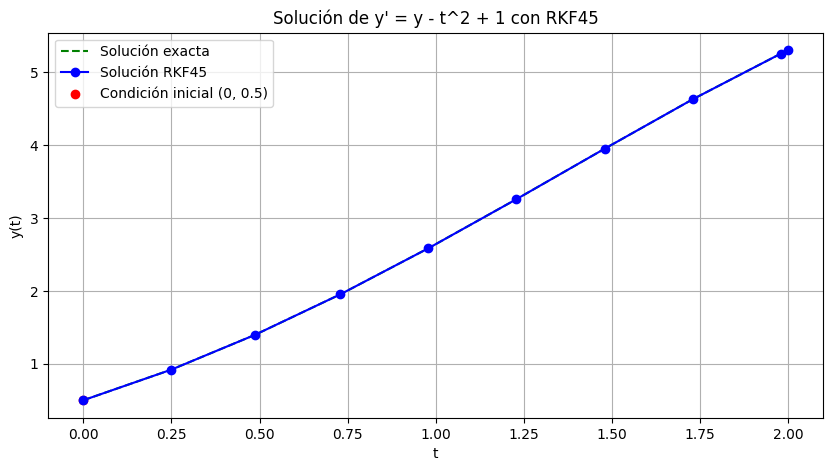

          t         w         h                       R  y_exacta(t)
0  0.000000  0.500000  0.250000           no se calcula     0.500000
1  0.250000  0.920489  0.236552   6.211109650454405e-06     0.920487
2  0.486552  1.396491  0.242781   4.487106326125284e-06     1.396488
3  0.729333  1.953749  0.250000   4.272160524246269e-06     1.953745
4  0.979333  2.586426  0.250000   3.774634518560749e-06     2.586420
5  1.229333  3.260461  0.250000  2.4380910806920397e-06     3.260452
6  1.479333  3.952096  0.250000   7.219341324610218e-07     3.952084
7  1.729333  4.630827  0.250000  1.4816565532954629e-06     4.630813
8  1.979333  5.257486  0.020667   4.311124986042247e-06     5.257469
9  2.000000  5.305490       NaN  4.0493388543071486e-10     5.305472


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Definimos la ecuación diferencial y' = y - t^2 + 1
def f(t, y):
    return y - t**2 + 1

# Solución exacta: y = t^2 + 2t + 1 - 0.5*e^t
def exact_solution(t):
    return t**2 + 2*t + 1 - 0.5*np.exp(t)

# Método Runge-Kutta-Fehlberg (RKF45)
def rkf45(a, b, alpha, TOL, hmax, hmin):#alpha=y0
    t = a
    w = alpha
    h = hmax
    FLAG = 1

    # Salida inicial
    t_values = [t]  # Incluir el punto inicial
    w_values = [w]  # Incluir el valor inicial
    h_values = []
    R_values = ["no se calcula"]  # Inicializar con "no se calcula"

    while FLAG == 1:
        if t + h > b:
            h = b - t

        # Paso 3: Calcular K1, K2, ..., K6
        K1 = h * f(t, w)
        K2 = h * f(t + 1/4 * h, w + 1/4 * K1)
        K3 = h * f(t + 3/8 * h, w + 3/32 * K1 + 9/32 * K2)
        K4 = h * f(t + 12/13 * h, w + 1932/2197 * K1 - 7200/2197 * K2 + 7296/2197 * K3)
        K5 = h * f(t + h, w + 439/216 * K1 - 8 * K2 + 3680/513 * K3 - 845/4104 * K4)
        K6 = h * f(t + 1/2 * h, w - 8/27 * K1 + 2 * K2 - 3544/2565 * K3 + 1859/4104 * K4 - 11/40 * K5)

        # Paso 4: Estimar R
        R = (1/h) * np.abs((1/360) * K1 - (128/4275) * K3 - (2197/75240) * K4 + (1/50) * K5 + (2/55) * K6)

        # Agregar el valor de R
        R_values.append(R)

        # Paso 5: Si R <= TOL, la aproximación es aceptada
        if R <= TOL:
            t = t + h
            w = w + (25/216) * K1 + (1408/2565) * K3 + (2197/4104) * K4 - (1/5) * K5
            t_values.append(t)
            w_values.append(w)
            h_values.append(h)
        else:
            # Si la aproximación no es aceptada, agregar "no se calcula" a R_values
            R_values.append("no se calcula")  # Mantener el último valor de R como "no se calcula"

        # Paso 8: Determinar el nuevo tamaño de paso
        delta = 0.84 * (TOL / R)**0.25

        if delta <= 0.1:
            h = 0.1 * h
        elif delta >= 4:
            h = 4 * h
        else:
            h = delta * h

        # Paso 10: Limitar el tamaño de paso a hmax
        if h > hmax:
            h = hmax

        # Paso 11: Verificar las condiciones de terminación
        if t >= b:
            FLAG = 0
        elif t + h > b:
            h = b - t
        elif h < hmin:
            FLAG = 0
            return "h mínima excedida", np.array(t_values), np.array(w_values), np.array(h_values), np.array(R_values)

    # Convertir a arrays de numpy para asegurar que tengan la misma longitud
    max_len = max(len(t_values), len(w_values), len(h_values), len(R_values))

    while len(t_values) < max_len:
        t_values.append(np.nan)  # Rellenar con NaN si es necesario
    while len(w_values) < max_len:
        w_values.append(np.nan)  # Rellenar con NaN si es necesario
    while len(h_values) < max_len:
        h_values.append(np.nan)  # Rellenar con NaN si es necesario
    while len(R_values) < max_len:
        R_values.append(np.nan)  # Rellenar con NaN si es necesario

    return np.array(t_values), np.array(w_values), np.array(h_values), np.array(R_values)

# Parámetros de entrada
a = 0        # Extremo inferior
b = 2        # Extremo superior
alpha = 0.5  # Condición inicial
TOL = 1e-5   # Tolerancia
hmax = 0.25  # Tamaño de paso máximo
hmin = 0.01  # Tamaño de paso mínimo

# Solución numérica usando RKF45
t_values, w_values, h_values, R_values = rkf45(a, b, alpha, TOL, hmax, hmin)

# Solución exacta
y_exact_values = exact_solution(t_values)

# Graficar la solución numérica y la solución exacta
plt.figure(figsize=(10, 5))
plt.plot(t_values, y_exact_values, label="Solución exacta", linestyle="--", color="green")
plt.plot(t_values, w_values, label="Solución RKF45", marker="o", color="blue")
plt.scatter(0, alpha, color='red', label='Condición inicial (0, 0.5)')  # Punto inicial
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Solución de y' = y - t^2 + 1 con RKF45")
plt.legend()
plt.grid(True)
plt.show()

# Crear una tabla con los valores de t, w, h, R y la solución exacta
df = pd.DataFrame({
    't': t_values,
    'w': w_values,
    'h': h_values,
    'R': R_values,
    'y_exacta(t)': y_exact_values  # Usar la solución exacta
})

print(df)